<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/distributions_et_le_th%C3%A9or%C3%A8me_centrale_limite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving amir_deals.csv to amir_deals.csv


In [ ]:
amir_deals = pd.read_csv('/content/amir_deals.csv')
print(amir_deals.head())

   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17


In [ ]:
amir_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  178 non-null    int64  
 1   product     178 non-null    object 
 2   client      178 non-null    object 
 3   status      178 non-null    object 
 4   amount      178 non-null    float64
 5   num_users   178 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ KB


In [ ]:
import matplotlib.pyplot as plt

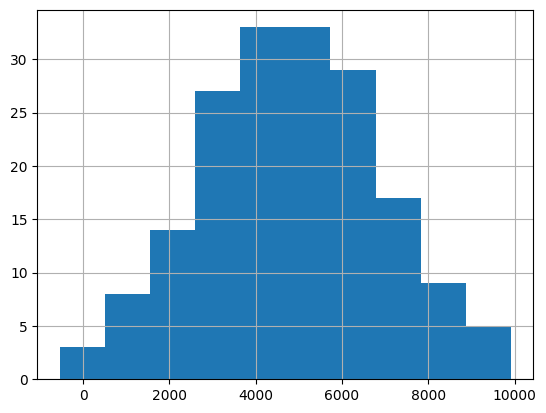

In [ ]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins = 10)
plt.show()

# **Probabilities from the normal distribution**

What's the probability of Amir closing a deal worth less than $7500?

 follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars

In [ ]:
# Import uniform from scipy.stats
from scipy.stats import norm

In [ ]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

0.8943502263331446


What's the probability of Amir closing a deal worth more than $1000?

In [ ]:
# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


What's the probability of Amir closing a deal worth between $3000  and $7000 ?

In [ ]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

0.6826894921370859


What amount will 25% of Amir's sales be less than?

In [ ]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

3651.0204996078364


You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

# **Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution

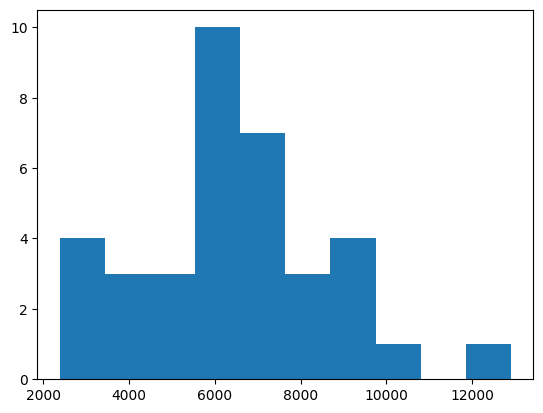

In [ ]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

# **la limite centrale en action**

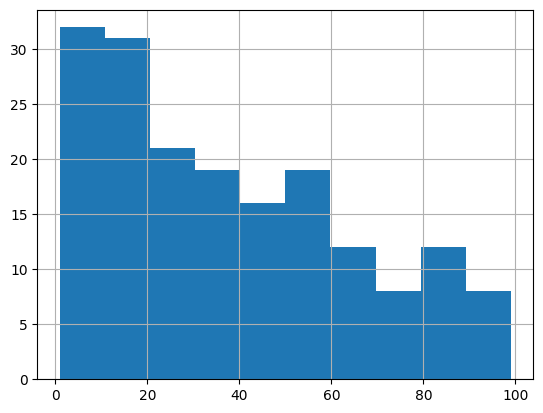

In [ ]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [ ]:
import numpy as np

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20,replace = True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.

In [ ]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(np.mean(samp_20))

print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


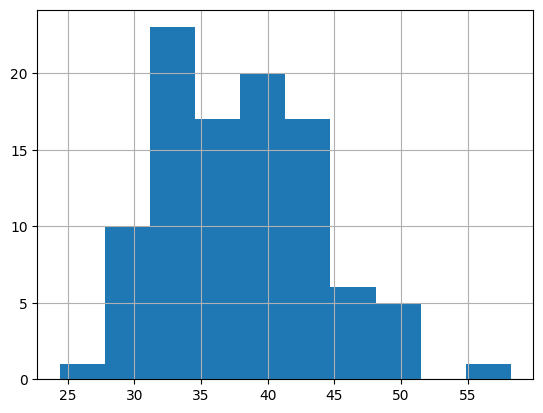

In [ ]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

You've just seen the central limit thorem at work. Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution.

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20,replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

38.821666666666665
37.651685393258425


Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!

# **Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [ ]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


What's the probability that Amir responds to 2 or fewer leads in a day?

In [ ]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


What's the probability that Amir responds to more than 10 leads in a day?

In [ ]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


# **Modeling time between leads**

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours.

What's the probability it takes Amir less than an hour to respond to a lead?

In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


What's the probability it takes Amir more than 4 hours to respond to a lead?

In [ ]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4,scale = 2.5))

0.20189651799465536


What's the probability it takes Amir 3-4 hours to respond to a lead?

In [ ]:
# Print probability response takes 3-4 hours
print(expon.cdf(4,scale=2.5) - expon.cdf(3,scale=2.5))

0.09929769391754684


### ***There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses.***